✅ Data Loaded: (500000, 46)
✅ DateTime Conversion Done


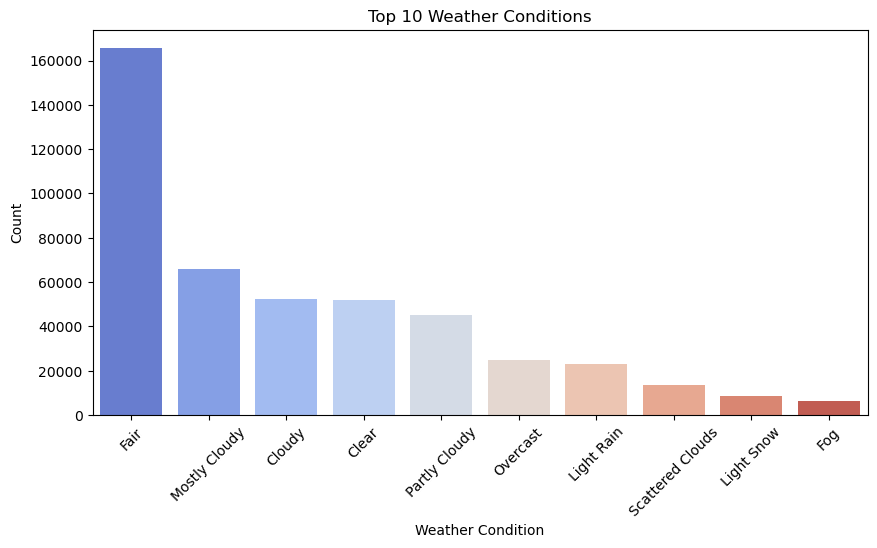

✅ Weather Plot Done


C:\Users\anime\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


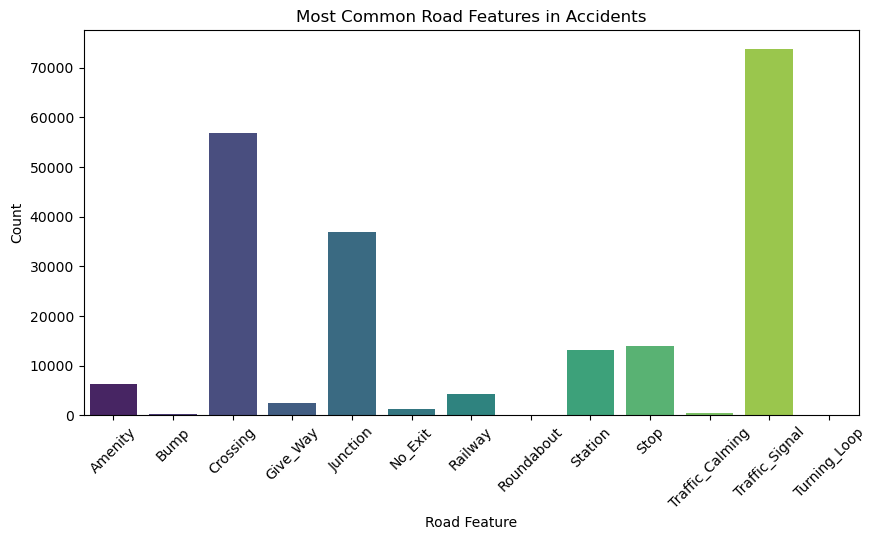

✅ Road Features Plot Done


C:\Users\anime\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anime\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


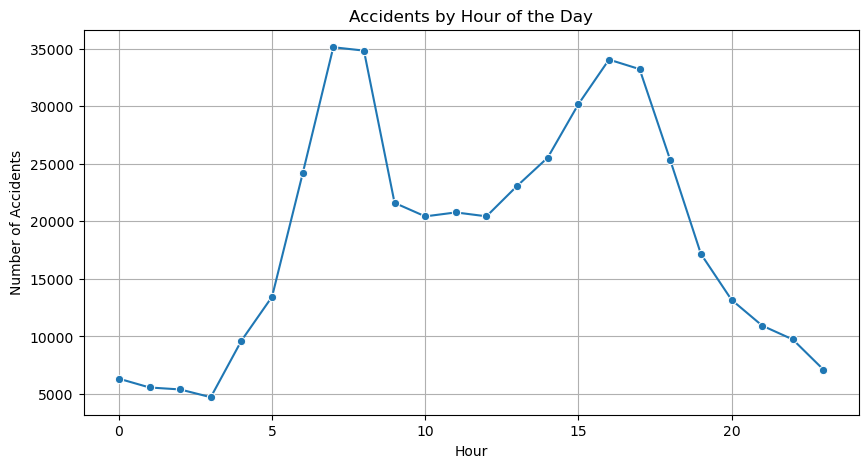

✅ Hourly Plot Done


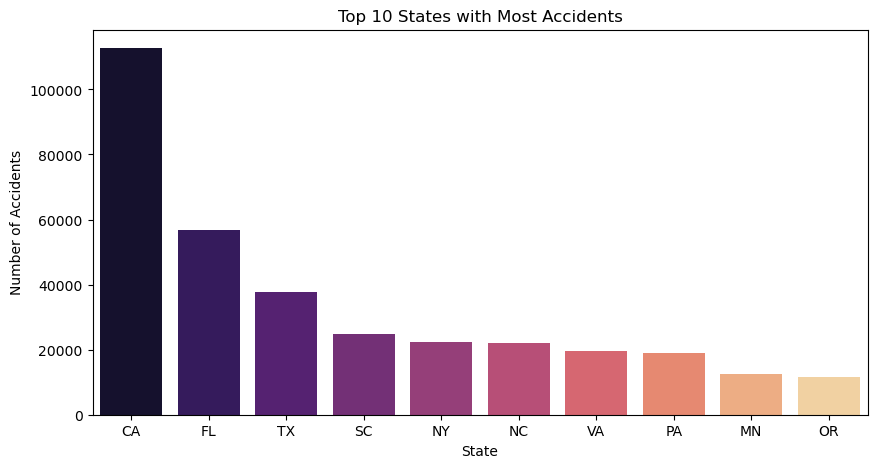

✅ State Plot Done


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

file_path = r"C:\Users\anime\Downloads\archive\US_Accidents_March23.csv"

n_samples = 500_000
row_count = sum(1 for _ in open(file_path)) - 1
skip = sorted(random.sample(range(1, row_count + 1), row_count - n_samples))

df = pd.read_csv(file_path, skiprows=skip)
print("✅ Data Loaded:", df.shape)

df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
print("✅ DateTime Conversion Done")

top_weather = df['Weather_Condition'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_weather.index, y=top_weather.values,
            palette="coolwarm", dodge=False)
plt.xticks(rotation=45)
plt.title("Top 10 Weather Conditions")
plt.xlabel("Weather Condition")
plt.ylabel("Count")
plt.show()
print("✅ Weather Plot Done")

road_features = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction',
                 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
                 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']

road_counts = {feature: df[feature].sum() for feature in road_features if feature in df.columns}
plt.figure(figsize=(10, 5))
sns.barplot(x=list(road_counts.keys()), y=list(road_counts.values()),
            palette="viridis", dodge=False)
plt.xticks(rotation=45)
plt.title("Most Common Road Features in Accidents")
plt.xlabel("Road Feature")
plt.ylabel("Count")
plt.show()
print("✅ Road Features Plot Done")

df['Hour'] = df['Start_Time'].dt.hour
hourly_accidents = df['Hour'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_accidents.index, y=hourly_accidents.values, marker='o')
plt.title("Accidents by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Number of Accidents")
plt.grid(True)
plt.show()
print("✅ Hourly Plot Done")

top_states = df['State'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_states.index, y=top_states.values,
            palette="magma", dodge=False)
plt.title("Top 10 States with Most Accidents")
plt.xlabel("State")
plt.ylabel("Number of Accidents")
plt.show()
print("✅ State Plot Done")

df['DayOfWeek'] = df['Start_Time'].dt.day_name()
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_counts = df['DayOfWeek'].value_counts().reindex(day_order)

plt.figure(figsize=(10, 5))
sns.barplot(x=day_counts.index, y=day_counts.values,
            palette="cubehelix", dodge=False)
plt.title("Accidents by Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Accidents")
plt.show()
print("✅ Day of Week Plot Done")
